# House Prices: Advanced Regression Techniques[RMSE: 0.11220 ]

* This is my third notebook. Do point out my mistakes in comment section.
* I have achieved 86th rank in the leaderboard.
* A brief work is done on EDA and Feature Engineering.
* If you find my work interesting, do upvote it.

# Introduction

The three major portion of this notebook are:-

1. Exploratory Data Analysis
2. Feature Engineering
3. Modeling[Stacking and Blending] 


This is default first cell in any kaggle kernel. They import NumPy and Pandas libraries and it also lists the available Kernel files. NumPy is the fundamental package for scientific computing with Python. Pandas is the most popular python library that is used for data analysis.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-submission2/submission 2.csv
/kaggle/input/top-submission1/submission 1.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/top-submission3/submission 3.csv


# Importing Necessary Libraries

In [2]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from datetime import datetime
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

# Data Loading

Our first step is to extract train and test data. We will be extracting data using pandas function read_csv. Specify the location to the dataset and import them.

In [3]:
# Importing train data

train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
train.head(6) # Mention no of rows to be displayed from the top in the argument

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [4]:
# Importing test data

test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
test.head(6) # Mention no of rows to be displayed from the top in the argument

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


# Describing Dataset

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# Looking for Missing Values

In [7]:
# In training set

for i in range(train.shape[1]):
    print(train.columns[i],"-",train.iloc[:,i].isnull().sum())

Id - 0
MSSubClass - 0
MSZoning - 0
LotFrontage - 259
LotArea - 0
Street - 0
Alley - 1369
LotShape - 0
LandContour - 0
Utilities - 0
LotConfig - 0
LandSlope - 0
Neighborhood - 0
Condition1 - 0
Condition2 - 0
BldgType - 0
HouseStyle - 0
OverallQual - 0
OverallCond - 0
YearBuilt - 0
YearRemodAdd - 0
RoofStyle - 0
RoofMatl - 0
Exterior1st - 0
Exterior2nd - 0
MasVnrType - 8
MasVnrArea - 8
ExterQual - 0
ExterCond - 0
Foundation - 0
BsmtQual - 37
BsmtCond - 37
BsmtExposure - 38
BsmtFinType1 - 37
BsmtFinSF1 - 0
BsmtFinType2 - 38
BsmtFinSF2 - 0
BsmtUnfSF - 0
TotalBsmtSF - 0
Heating - 0
HeatingQC - 0
CentralAir - 0
Electrical - 1
1stFlrSF - 0
2ndFlrSF - 0
LowQualFinSF - 0
GrLivArea - 0
BsmtFullBath - 0
BsmtHalfBath - 0
FullBath - 0
HalfBath - 0
BedroomAbvGr - 0
KitchenAbvGr - 0
KitchenQual - 0
TotRmsAbvGrd - 0
Functional - 0
Fireplaces - 0
FireplaceQu - 690
GarageType - 81
GarageYrBlt - 81
GarageFinish - 81
GarageCars - 0
GarageArea - 0
GarageQual - 81
GarageCond - 81
PavedDrive - 0
WoodDeckSF -

In [8]:
# In test set

for i in range(test.shape[1]):
    print(test.columns[i],"-",test.iloc[:,i].isnull().sum())

Id - 0
MSSubClass - 0
MSZoning - 4
LotFrontage - 227
LotArea - 0
Street - 0
Alley - 1352
LotShape - 0
LandContour - 0
Utilities - 2
LotConfig - 0
LandSlope - 0
Neighborhood - 0
Condition1 - 0
Condition2 - 0
BldgType - 0
HouseStyle - 0
OverallQual - 0
OverallCond - 0
YearBuilt - 0
YearRemodAdd - 0
RoofStyle - 0
RoofMatl - 0
Exterior1st - 1
Exterior2nd - 1
MasVnrType - 16
MasVnrArea - 15
ExterQual - 0
ExterCond - 0
Foundation - 0
BsmtQual - 44
BsmtCond - 45
BsmtExposure - 44
BsmtFinType1 - 42
BsmtFinSF1 - 1
BsmtFinType2 - 42
BsmtFinSF2 - 1
BsmtUnfSF - 1
TotalBsmtSF - 1
Heating - 0
HeatingQC - 0
CentralAir - 0
Electrical - 0
1stFlrSF - 0
2ndFlrSF - 0
LowQualFinSF - 0
GrLivArea - 0
BsmtFullBath - 2
BsmtHalfBath - 2
FullBath - 0
HalfBath - 0
BedroomAbvGr - 0
KitchenAbvGr - 0
KitchenQual - 1
TotRmsAbvGrd - 0
Functional - 2
Fireplaces - 0
FireplaceQu - 730
GarageType - 76
GarageYrBlt - 78
GarageFinish - 78
GarageCars - 1
GarageArea - 1
GarageQual - 78
GarageCond - 78
PavedDrive - 0
WoodDeckSF

Look like we have lot of missing values to deal with. We will fix missing values after the EDA part.

# EDA

Our main focus is target variable which is SalePrice. Let's find out how this column is distributed.

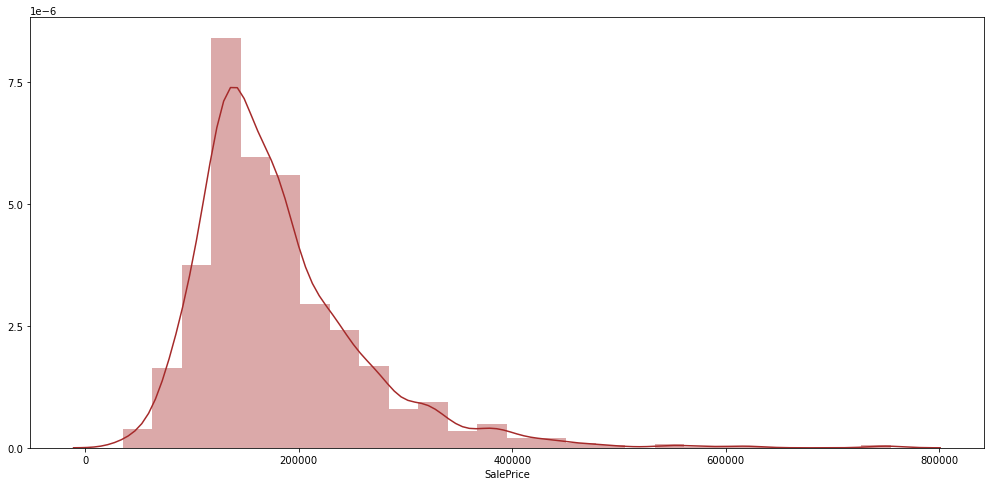

In [9]:
fig = plt.figure(figsize=(15,8))
sns.distplot(train["SalePrice"],bins=26,color="brown")
sns.set_style("white")
sns.set_context("poster",font_scale=2)
plt.tight_layout()

Sice the tail is on right side, the distribution is positively skewd. You can verify it by checking the value of mean, median and mode. In positively skewd, mean and median is greater than mode. Let's, check the magnitude of skewness.

In [10]:
#skewness 

print("Skewness: " + str(train['SalePrice'].skew()))

Skewness: 1.8828757597682129


We will fix this later. Now, let's check the relation between the target variable and other features.

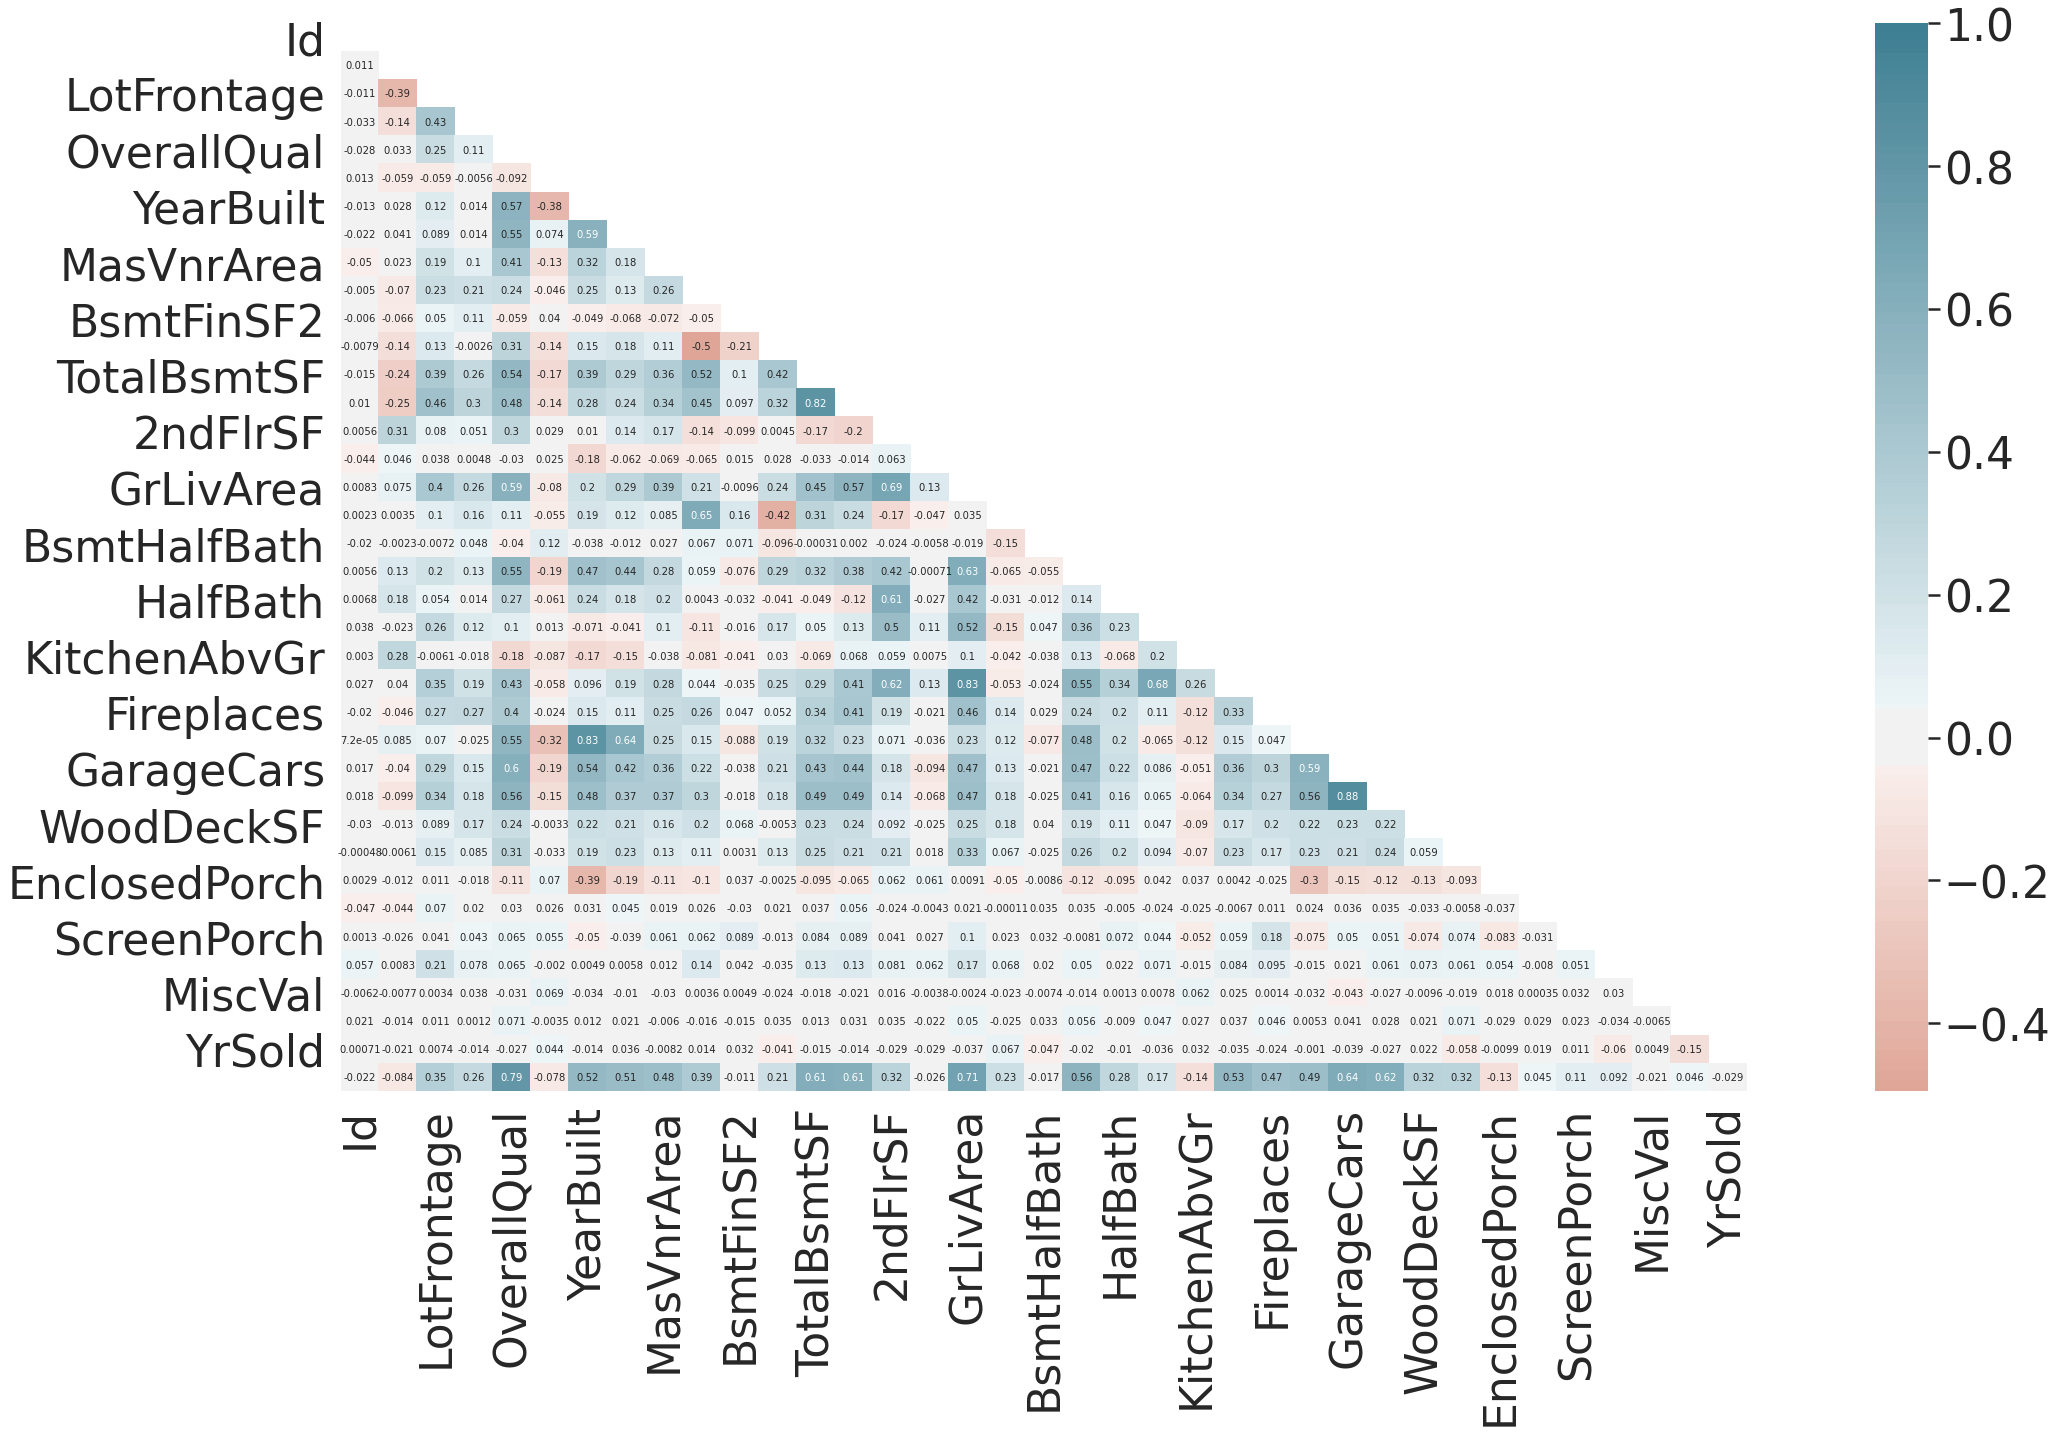

In [11]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
 

mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(train.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
            cbar="coolwarm",
           );
plt.tight_layout()

As we can see, the multicollinearity(strong correlation between independent variables) exists in various features. Rather than deleting these features from the dataset, we will be using many algorithms as scikit learn modules makes it easy to implement them and get the best possible outcome.

In [12]:
train.corr()["SalePrice"].sort_values(ascending=False)[1:]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Now, let's plot and visualize the relation between dependent feature and highly corelated independent feature.

### **SalePrice vs OverallQual **

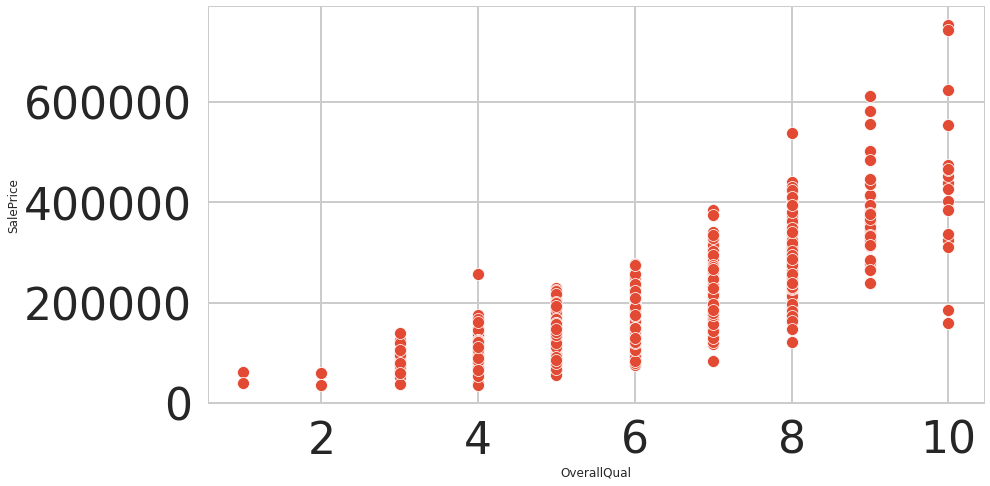

In [13]:
fig = plt.figure(figsize=(15,8))
sns.scatterplot(x="OverallQual",y="SalePrice",data=train)
sns.set_style("whitegrid")
sns.set_context("poster",font_scale=2)
plt.tight_layout()

### **SalePrice vs GrLivArea** 

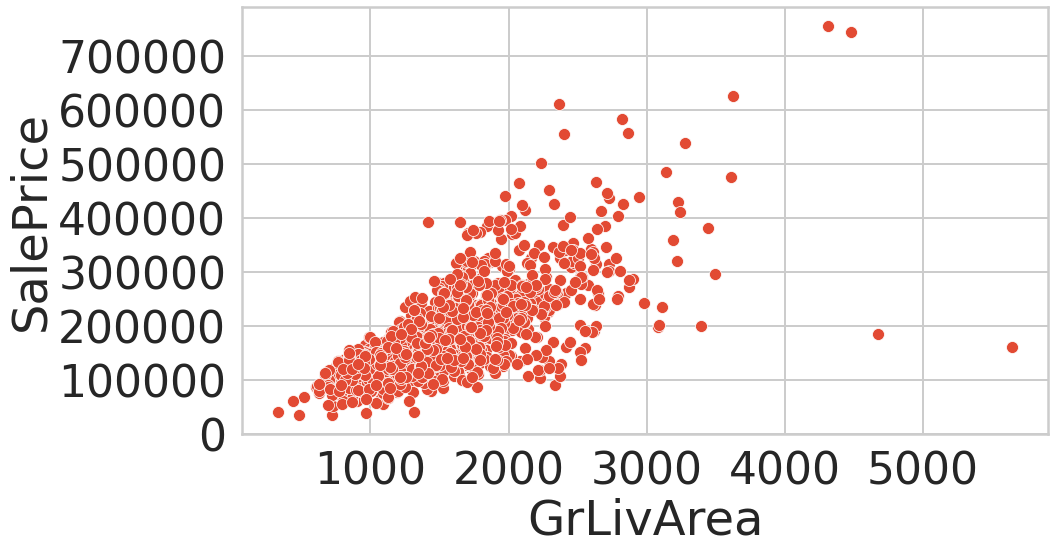

In [14]:
fig = plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea",y="SalePrice",data=train)
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5)
plt.tight_layout()

### **SalePrice vs GarageArea**

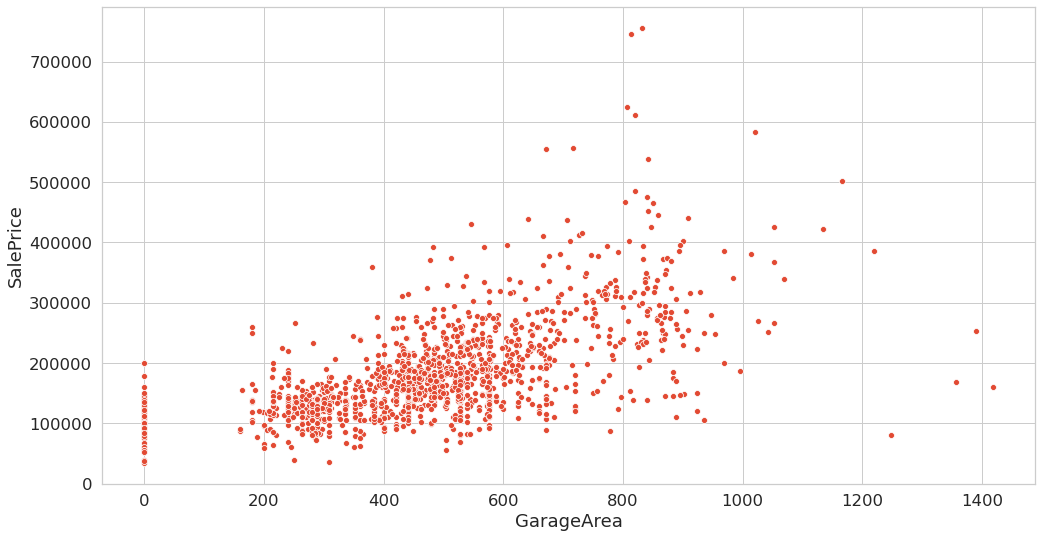

In [15]:
fig = plt.figure(figsize=(15,8))
sns.scatterplot(x="GarageArea",y="SalePrice",data=train)
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=2)
plt.tight_layout()

* From the above plot, it is visible that there are outliers in the scatter plot.
* As the column "GrLivArea" increase, the value of SalePrice increases. But two points after 4500 do not follow this trend. 

In [16]:
## Deleting those two values with outliers.
train = train[train.GrLivArea < 4500]
train.reset_index(drop = True, inplace = True)

previous_train = train.copy()
print(train.shape)

(1458, 81)


# Feature Engineering

In [17]:
train["SalePrice"] = np.log1p(train["SalePrice"])
train.drop(columns=['Id'],axis=1, inplace=True)
test.drop(columns=['Id'],axis=1, inplace=True)

## Saving the target values in "y_train". 
y = train['SalePrice'].reset_index(drop=True)



# getting a copy of train
previous_train = train.copy()

In [18]:
## Combining train and test datasets together so that we can do all the work at once. 
all_data = pd.concat((train, test)).reset_index(drop = True)
## Dropping the target variable. 
all_data.drop(['SalePrice'], axis = 1, inplace = True)


### Eliminating missing values 

In [19]:
# count of missing values in each feature
for i in range(all_data.shape[1]):
    print(all_data.columns[i],"-",all_data.iloc[:,i].isnull().sum())

MSSubClass - 0
MSZoning - 4
LotFrontage - 486
LotArea - 0
Street - 0
Alley - 2719
LotShape - 0
LandContour - 0
Utilities - 2
LotConfig - 0
LandSlope - 0
Neighborhood - 0
Condition1 - 0
Condition2 - 0
BldgType - 0
HouseStyle - 0
OverallQual - 0
OverallCond - 0
YearBuilt - 0
YearRemodAdd - 0
RoofStyle - 0
RoofMatl - 0
Exterior1st - 1
Exterior2nd - 1
MasVnrType - 24
MasVnrArea - 23
ExterQual - 0
ExterCond - 0
Foundation - 0
BsmtQual - 81
BsmtCond - 82
BsmtExposure - 82
BsmtFinType1 - 79
BsmtFinSF1 - 1
BsmtFinType2 - 80
BsmtFinSF2 - 1
BsmtUnfSF - 1
TotalBsmtSF - 1
Heating - 0
HeatingQC - 0
CentralAir - 0
Electrical - 1
1stFlrSF - 0
2ndFlrSF - 0
LowQualFinSF - 0
GrLivArea - 0
BsmtFullBath - 2
BsmtHalfBath - 2
FullBath - 0
HalfBath - 0
BedroomAbvGr - 0
KitchenAbvGr - 0
KitchenQual - 1
TotRmsAbvGrd - 0
Functional - 2
Fireplaces - 0
FireplaceQu - 1420
GarageType - 157
GarageYrBlt - 159
GarageFinish - 159
GarageCars - 1
GarageArea - 1
GarageQual - 159
GarageCond - 159
PavedDrive - 0
WoodDeckSF 

In [20]:
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    all_data[i] = all_data[i].fillna('None')

In [21]:
## In the following features the null values are there for a purpose, so we replace them with "0"
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    all_data[i] = all_data[i].fillna(0)
    
## Replaced all missing values in LotFrontage by imputing the median value of each neighborhood. 
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

In [22]:
## Zoning class are given in numerical; therefore converted to categorical variables. 
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str) 

In [23]:
all_data['Functional'] = all_data['Functional'].fillna('Typ') 
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub') 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) 
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA") 
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr") 

In [24]:
# count of missing values in each feature

sum = 0
for i in range(all_data.shape[1]):
    sum = sum + all_data.iloc[:,i].isnull().sum()
print(sum)    

0


No missing values are left.

### Fixing Skewness

In [25]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_feats

MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
MasVnrArea        2.621719
OpenPorchSF       2.529358
WoodDeckSF        1.844792
1stFlrSF          1.257286
GrLivArea         1.068750
LotFrontage       1.058803
BsmtFinSF1        0.980645
BsmtUnfSF         0.919688
2ndFlrSF          0.861556
TotRmsAbvGrd      0.749232
Fireplaces        0.725278
HalfBath          0.696666
TotalBsmtSF       0.671751
BsmtFullBath      0.622415
OverallCond       0.569314
BedroomAbvGr      0.326568
GarageArea        0.216857
OverallQual       0.189591
FullBath          0.165514
GarageCars       -0.219297
YearRemodAdd     -0.450134
YearBuilt        -0.599194
GarageYrBlt      -3.904632
dtype: float64

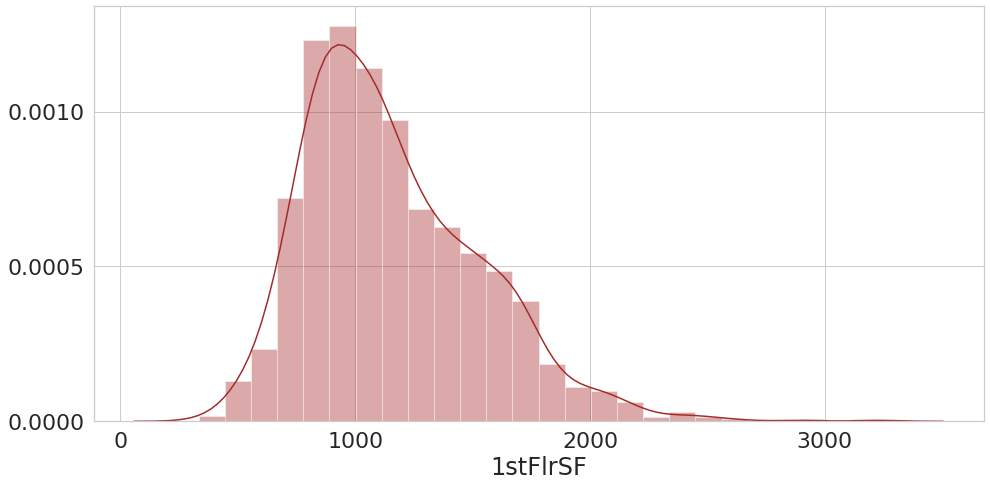

In [26]:
fig = plt.figure(figsize=(15,8))
sns.distplot(train["1stFlrSF"],bins=26,color="brown")
sns.set_style("white")
sns.set_context("poster",font_scale=2)
plt.tight_layout()

In [27]:
## Fixing Skewed features 
def fixing_skewness(df):
    """
    This function takes in a dataframe and return fixed skewed dataframe
    """
    ## Import necessary modules 
    from scipy.stats import skew
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    ## Getting all the data that are not of "object" type. 
    numeric_feats = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index

    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))

fixing_skewness(all_data)

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


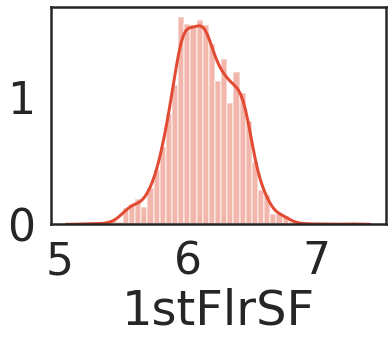

In [28]:
sns.distplot(all_data['1stFlrSF']);

### Creating New Features

In [29]:
all_data['TotalSF'] = (all_data['TotalBsmtSF'] 
                       + all_data['1stFlrSF'] 
                       + all_data['2ndFlrSF'])

all_data['YrBltAndRemod'] = all_data['YearBuilt'] + all_data['YearRemodAdd']

all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] 
                                 + all_data['BsmtFinSF2'] 
                                 + all_data['1stFlrSF'] 
                                 + all_data['2ndFlrSF']
                                )
                                 

all_data['Total_Bathrooms'] = (all_data['FullBath'] 
                               + (0.5 * all_data['HalfBath']) 
                               + all_data['BsmtFullBath'] 
                               + (0.5 * all_data['BsmtHalfBath'])
                              )
                               

all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] 
                              + all_data['3SsnPorch'] 
                              + all_data['EnclosedPorch'] 
                              + all_data['ScreenPorch'] 
                              + all_data['WoodDeckSF']
                             )

In [30]:
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


In [31]:
all_data.shape

(2917, 89)

### Deleting Features 

In [32]:
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

### Creating Dummy Variables 

In [33]:
final_features = pd.get_dummies(all_data).reset_index(drop=True)
final_features.shape

(2917, 333)

In [34]:
X = final_features.iloc[:len(y), :]

X_sub = final_features.iloc[len(y):, :]

In [35]:
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

In [36]:
def overfit_reducer(df):
    """
    This function takes in a dataframe and returns a list of features that are overfitted.
    """
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.94:
            overfit.append(i)
    overfit = list(overfit)
    return overfit


overfitted_features = overfit_reducer(X)

X = X.drop(overfitted_features, axis=1)
X_sub = X_sub.drop(overfitted_features, axis=1)

In [37]:
X.shape,y.shape, X_sub.shape

((1453, 332), (1453,), (1459, 332))

# Modeling[Stacking and Blending]

In this section, we will use different regression model and will also create model using stacking them. Now, we will perform blending of all these models and also perform blending with top submission kernel. We perform blending with top submission to improve accuracy.

* Ridge
* Lasso
* Elastic Net
* SVR
* LGBMRegressor
* Xgboost


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 42)

In [39]:
# Ridge

alpha_ridge = [-3,-2,-1,1e-15, 1e-10, 1e-8,1e-5,1e-4, 1e-3,1e-2,0.5,1,1.5, 2,3,4, 5, 10, 20, 30, 40]
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    
    ridge = Ridge(alpha= i, normalize=True)
    
    ridge.fit(X_train, y_train)

    y_pred = ridge.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    temp_mse[i] = mse
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))    

0.5: 0.01166175867352835
0.01: 0.012535537450655002
1: 0.012834892451199712
1e-05: 0.012890252122437603
1e-15: 0.012897039341577423
1e-08: 0.01290523083100646
1e-10: 0.012905254257801554
0.0001: 0.012917919018793769
0.001: 0.012964387206030822
1.5: 0.014125387437860116
2: 0.015434985400411645
3: 0.018053037309773208
4: 0.02064670395484147
5: 0.023203423837298683
10: 0.035206653603213796
20: 0.05476067139948501
30: 0.06929460310635767
40: 0.08028729392787438
-1: 6.112692808930448
-2: 109.73456718490822
-3: 240.2508063505232


In [40]:
# Lasso

temp_mse = {}
for i in alpha_ridge:
     
    lasso_reg = Lasso(alpha= i, normalize=True)
    
    lasso_reg.fit(X_train, y_train)
    
    y_pred = lasso_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    
    temp_mse[i] = mse
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.844443565786061, tolerance: 0.015580999592093078
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8441692951592743, tolerance: 0.015580999592093078
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.816980297912179, tolerance: 0.015580999592093078
  positive)


0.0001: 0.010273011069775984
1e-05: 0.011789701352025261
1e-08: 0.013003802477099051
1e-10: 0.013012010678336882
1e-15: 0.013012139211363924
0.001: 0.01663842311467108
0.01: 0.1422234983170902
0.5: 0.15348200894957012
1: 0.15348200894957012
1.5: 0.15348200894957012
2: 0.15348200894957012
3: 0.15348200894957012
4: 0.15348200894957012
5: 0.15348200894957012
10: 0.15348200894957012
20: 0.15348200894957012
30: 0.15348200894957012
40: 0.15348200894957012
-1: 10991100463.438883
-2: 43964402057.07176
-3: 98919904780.9114


In [41]:
# Elastic Net

from sklearn.linear_model import ElasticNet

temp_mse = {}
for i in alpha_ridge:
 
    lasso_reg = ElasticNet(alpha= i, normalize=True)
    
    lasso_reg.fit(X_train, y_train)
    
    y_pred = lasso_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    
    temp_mse[i] = mse
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.844443567185356, tolerance: 0.015580999592093078
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8443092099960334, tolerance: 0.015580999592093078
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.830841620355838, tolerance: 0.015580999592093078
  positive)


0.0001: 0.01036756235867408
1e-05: 0.012065051720307762
1e-08: 0.013006891182224655
1e-10: 0.013012072076120174
1e-15: 0.013012139211977839
0.001: 0.013572692997875646
0.01: 0.09812602673878036
0.5: 0.15348200894957012
1: 0.15348200894957012
1.5: 0.15348200894957012
2: 0.15348200894957012
3: 0.15348200894957012
4: 0.15348200894957012
5: 0.15348200894957012
10: 0.15348200894957012
20: 0.15348200894957012
30: 0.15348200894957012
40: 0.15348200894957012
-3: 5.259161747242396
-2: 5.339826791276539
-1: 5.593656568146852


In [42]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [43]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [44]:
# Ridge, Lasso and Elastic Net
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, 
                                              alphas=alphas2, 
                                              random_state=42, 
                                              cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))  

In [45]:
score = cv_rmse(ridge)
print("Ridge:" , score.mean(), score.std())

score = cv_rmse(lasso)
print("Lasso:" , score.mean(), score.std())

score = cv_rmse(elasticnet)
print("ElasticNet:" , score.mean() , score.std())

Ridge: 0.10114386634061572 0.014067875169502054
Lasso: 0.0997455312295964 0.014206270566900103
ElasticNet: 0.09978310495035093 0.014314420333294022


In [46]:
# SVR

svr = SVR()
parameters = {'C':[15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],'epsilon':[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009],'gamma':[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]}
rs= RobustScaler()
X_rs = rs.fit_transform(X)
svr_reg = RandomizedSearchCV(svr,parameters,scoring="neg_mean_squared_error",cv = 5,n_iter = 100,verbose =3,n_jobs =-1)
svr_reg.fit(X_rs,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.0min finished


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [15, 16, 17, 18, 19, 20, 21, 22,
                                              23, 24, 25, 26, 27, 28, 29, 30],
                                        'epsilon': [0.001, 0.002, 0.003, 0.004,
                                                    0.005, 0.006, 0.007, 0.008,
                                                    0.009],
                                        'gamma': [0.0001, 0.0002, 0.0003,
                                                  0.0004, 0.0005, 0.0006,
                                                  0.0007, 0.0008, 0.0009]},
                   scoring='neg_mean_squared_error', verbose=3)

In [47]:
svr_reg.best_params_

{'gamma': 0.0002, 'epsilon': 0.001, 'C': 26}

In [48]:
# SVR

svr = make_pipeline(RobustScaler(), SVR(C= 28, epsilon= 0.001, gamma=0.0002,))
score = cv_rmse(svr)
print("SVR:" , score.mean() , score.std())

SVR: 0.1016591624386494 0.014926833920513043


In [49]:
# LGBMRegressor

lgbm = LGBMRegressor(objective='regression',random_state=42)
parameters={'num_leaves':[1,3,4,5,6,8,10],'learning_rate':[0.001,0.01,0.02,0.03,0.04,0.05,0.06],'n_estimators':[500,1000,3000,5000,10000],'max_bin':[100,200,300,400,500],'bagging_fraction':[0.25,0.50,0.75],'bagging_freq':[3,4,5,6,7], 'bagging_seed':[5,6,7,8,9],'feature_fraction':[0.1,0.2,0.3,0.4,0.5,0.6],'feature_fraction_seed':[5,6,7,8,9]}
lgbm_reg = RandomizedSearchCV(lgbm,parameters,scoring="neg_mean_squared_error",cv = 5,n_iter = 100,verbose =3,n_jobs =-1)
lgbm_reg.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.7min finished


RandomizedSearchCV(cv=5,
                   estimator=LGBMRegressor(objective='regression',
                                           random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bagging_fraction': [0.25, 0.5, 0.75],
                                        'bagging_freq': [3, 4, 5, 6, 7],
                                        'bagging_seed': [5, 6, 7, 8, 9],
                                        'feature_fraction': [0.1, 0.2, 0.3, 0.4,
                                                             0.5, 0.6],
                                        'feature_fraction_seed': [5, 6, 7, 8,
                                                                  9],
                                        'learning_rate': [0.001, 0.01, 0.02,
                                                          0.03, 0.04, 0.05,
                                                          0.06],
                                        'max_bin': [100, 200,

In [50]:
lgbm_reg.best_params_

{'num_leaves': 4,
 'n_estimators': 5000,
 'max_bin': 100,
 'learning_rate': 0.01,
 'feature_fraction_seed': 7,
 'feature_fraction': 0.1,
 'bagging_seed': 6,
 'bagging_freq': 7,
 'bagging_fraction': 0.5}

In [51]:
np.sqrt(-lgbm_reg.best_score_)

0.10969289671098952

In [52]:
# LGBMRegressor

lgbm = LGBMRegressor(objective='regression',random_state=42,num_leaves=10,
  n_estimators=3000,
  max_bin= 300,
  learning_rate= 0.01,
  feature_fraction_seed=5,
  feature_fraction=0.3,
  bagging_seed=8,
  bagging_freq=4,
  bagging_fraction=0.75)

In [53]:
# Xgboost

xgb = XGBRegressor(random_state=42,learning_rate=0.01)
parameters={'n_estimators':[3000,3500,3250,3750,4000,5000],'max_depth':[1,2,3,4,5,6],'min_child_weight':[1,3,5,7],'gamma':[0.0,0.1,0.2,0.3],'colsample_bytree':[0.3,0.6,0.7]}
xgb_reg = RandomizedSearchCV(xgb,parameters,scoring="neg_mean_squared_error",cv = 5,n_iter = 5,verbose =3,n_jobs =-1)
xgb_reg.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.4min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=0.01,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                          tree_met

In [54]:
xgb_reg.best_params_

{'n_estimators': 5000,
 'min_child_weight': 7,
 'max_depth': 3,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [55]:
np.sqrt(-xgb_reg.best_score_)

0.11653143181921177

In [56]:
# Xgboost

xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3500,
                                     max_depth=5, min_child_weight=5,
                                     gamma=0.0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27)

In [57]:
# Stacking of regression model
stack_reg = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, xgboost, lgbm ),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [58]:
stack_model = stack_reg.fit(np.array(X), np.array(y))
print(1)

elastic_model = elasticnet.fit(X, y)
print(2)

lasso_model = lasso.fit(X, y)
print(3)

ridge_model = ridge.fit(X, y)
print(4)

svr_model = svr.fit(X, y)
print(5)

xgb_model = xgboost.fit(X, y)
print(6)

lgbm_model = lgbm.fit(X, y)
print(7)

[21:23:23] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:16] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:16] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:09] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:09] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:02] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:02] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:55] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of re

### Blending of models


In [59]:
def blend_models(X):
    return ((0.1 * elastic_model.predict(X)) + \
            (0.05 * lasso_model.predict(X)) + \
            (0.2 * ridge_model.predict(X)) + \
            (0.1 * svr_model.predict(X)) + \
            (0.15 * xgb_model.predict(X)) + \
            (0.1 * lgbm_model.predict(X)) + \
            (0.3 * stack_model.predict(np.array(X))))

In [60]:
print(rmsle(y, blend_models(X)))

0.050757674860195647


### Submission

In [61]:
submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(blend_models(X_sub)))

### Blending with top kernels 

In [62]:
sub_1 = pd.read_csv('../input/top-submission1/submission 1.csv')
sub_2 = pd.read_csv('../input/top-submission2/submission 2.csv')
sub_3 = pd.read_csv('../input/top-submission3/submission 3.csv')
submission.iloc[:,1] = np.floor((0.25 * np.floor(np.expm1(blend_models(X_sub)))) + 
                                (0.25 * sub_1.iloc[:,1]) + 
                                (0.25 * sub_2.iloc[:,1]) + 
                                (0.25 * sub_3.iloc[:,1]))

### Fixing Outliers


In [63]:
q1 = submission['SalePrice'].quantile(0.005)
q2 = submission['SalePrice'].quantile(0.995)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
submission.to_csv("submission_n.csv", index=False)

# Thank You!!